# Conjugate Gradient Method

## Introduction

The **Conjugate Gradient (CG) method** is an iterative algorithm for solving systems of linear equations of the form:

$$\mathbf{A}\mathbf{x} = \mathbf{b}$$

where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is a **symmetric positive definite (SPD)** matrix, $\mathbf{b} \in \mathbb{R}^n$ is the known right-hand side vector, and $\mathbf{x} \in \mathbb{R}^n$ is the unknown solution vector.

## Theoretical Foundation

### Quadratic Form Minimization

Solving $\mathbf{A}\mathbf{x} = \mathbf{b}$ is equivalent to minimizing the quadratic form:

$$f(\mathbf{x}) = \frac{1}{2}\mathbf{x}^T\mathbf{A}\mathbf{x} - \mathbf{b}^T\mathbf{x}$$

The gradient of this function is:

$$\nabla f(\mathbf{x}) = \mathbf{A}\mathbf{x} - \mathbf{b}$$

At the minimum, $\nabla f(\mathbf{x}) = \mathbf{0}$, which gives us $\mathbf{A}\mathbf{x} = \mathbf{b}$.

### A-Conjugacy

Two vectors $\mathbf{p}_i$ and $\mathbf{p}_j$ are said to be **A-conjugate** (or $\mathbf{A}$-orthogonal) if:

$$\mathbf{p}_i^T \mathbf{A} \mathbf{p}_j = 0 \quad \text{for } i \neq j$$

This property ensures that each search direction is independent in the $\mathbf{A}$-inner product space.

### The Algorithm

Given an initial guess $\mathbf{x}_0$, the CG algorithm proceeds as:

1. **Initialize:**
   $$\mathbf{r}_0 = \mathbf{b} - \mathbf{A}\mathbf{x}_0$$
   $$\mathbf{p}_0 = \mathbf{r}_0$$

2. **For** $k = 0, 1, 2, \ldots$ **until convergence:**
   
   - Compute step length:
     $$\alpha_k = \frac{\mathbf{r}_k^T \mathbf{r}_k}{\mathbf{p}_k^T \mathbf{A} \mathbf{p}_k}$$
   
   - Update solution:
     $$\mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k \mathbf{p}_k$$
   
   - Update residual:
     $$\mathbf{r}_{k+1} = \mathbf{r}_k - \alpha_k \mathbf{A} \mathbf{p}_k$$
   
   - Compute conjugate direction coefficient:
     $$\beta_k = \frac{\mathbf{r}_{k+1}^T \mathbf{r}_{k+1}}{\mathbf{r}_k^T \mathbf{r}_k}$$
   
   - Update search direction:
     $$\mathbf{p}_{k+1} = \mathbf{r}_{k+1} + \beta_k \mathbf{p}_k$$

### Convergence Properties

For an SPD matrix $\mathbf{A}$, the CG method converges in at most $n$ iterations (in exact arithmetic). The convergence rate depends on the **condition number** $\kappa(\mathbf{A}) = \frac{\lambda_{\max}}{\lambda_{\min}}$:

$$\|\mathbf{x}_k - \mathbf{x}^*\|_\mathbf{A} \leq 2\left(\frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1}\right)^k \|\mathbf{x}_0 - \mathbf{x}^*\|_\mathbf{A}$$

where $\|\mathbf{v}\|_\mathbf{A} = \sqrt{\mathbf{v}^T \mathbf{A} \mathbf{v}}$ is the $\mathbf{A}$-norm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Set random seed for reproducibility
np.random.seed(42)

## Implementation

### Conjugate Gradient Algorithm

In [2]:
def conjugate_gradient(A, b, x0=None, tol=1e-10, max_iter=None):
    """
    Solve Ax = b using the Conjugate Gradient method.
    
    Parameters:
    -----------
    A : ndarray
        Symmetric positive definite matrix (n x n)
    b : ndarray
        Right-hand side vector (n,)
    x0 : ndarray, optional
        Initial guess (n,). Defaults to zero vector.
    tol : float, optional
        Convergence tolerance for residual norm
    max_iter : int, optional
        Maximum number of iterations. Defaults to n.
    
    Returns:
    --------
    x : ndarray
        Solution vector
    residuals : list
        Residual norms at each iteration
    """
    n = len(b)
    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()
    
    if max_iter is None:
        max_iter = n
    
    # Initialize residual and search direction
    r = b - A @ x
    p = r.copy()
    rs_old = r @ r
    
    residuals = [np.sqrt(rs_old)]
    
    for k in range(max_iter):
        Ap = A @ p
        
        # Step length
        alpha = rs_old / (p @ Ap)
        
        # Update solution
        x = x + alpha * p
        
        # Update residual
        r = r - alpha * Ap
        
        rs_new = r @ r
        residuals.append(np.sqrt(rs_new))
        
        # Check convergence
        if np.sqrt(rs_new) < tol:
            break
        
        # Conjugate direction coefficient
        beta = rs_new / rs_old
        
        # Update search direction
        p = r + beta * p
        
        rs_old = rs_new
    
    return x, residuals

### Generate Test Problem

We create a symmetric positive definite matrix with controlled condition number to demonstrate convergence behavior.

In [3]:
def create_spd_matrix(n, condition_number):
    """
    Create a symmetric positive definite matrix with specified condition number.
    
    Parameters:
    -----------
    n : int
        Matrix dimension
    condition_number : float
        Desired condition number (ratio of largest to smallest eigenvalue)
    
    Returns:
    --------
    A : ndarray
        SPD matrix with specified condition number
    """
    # Generate random orthogonal matrix via QR decomposition
    Q, _ = np.linalg.qr(np.random.randn(n, n))
    
    # Create eigenvalues distributed between 1 and condition_number
    eigenvalues = np.linspace(1, condition_number, n)
    
    # Construct A = Q * D * Q^T
    A = Q @ np.diag(eigenvalues) @ Q.T
    
    return A

# Problem parameters
n = 100  # Matrix size
condition_numbers = [10, 100, 1000]  # Different condition numbers to test

# Create true solution and right-hand side
x_true = np.random.randn(n)

print(f"Problem size: {n} x {n}")
print(f"Testing condition numbers: {condition_numbers}")

Problem size: 100 x 100
Testing condition numbers: [10, 100, 1000]


## Numerical Experiments

### Effect of Condition Number on Convergence

In [4]:
# Store results for different condition numbers
results = {}

for kappa in condition_numbers:
    # Create SPD matrix with given condition number
    A = create_spd_matrix(n, kappa)
    b = A @ x_true
    
    # Solve using CG
    x_cg, residuals = conjugate_gradient(A, b, tol=1e-12, max_iter=200)
    
    # Compute actual condition number
    eigenvalues = eigh(A, eigvals_only=True)
    actual_kappa = eigenvalues[-1] / eigenvalues[0]
    
    # Compute solution error
    error = np.linalg.norm(x_cg - x_true) / np.linalg.norm(x_true)
    
    results[kappa] = {
        'residuals': residuals,
        'actual_kappa': actual_kappa,
        'error': error,
        'iterations': len(residuals) - 1
    }
    
    print(f"κ = {kappa}:")
    print(f"  Iterations: {results[kappa]['iterations']}")
    print(f"  Final residual: {residuals[-1]:.2e}")
    print(f"  Relative error: {error:.2e}")
    print()

κ = 10:
  Iterations: 44
  Final residual: 9.35e-13
  Relative error: 3.46e-14

κ = 100:
  Iterations: 73
  Final residual: 7.30e-13
  Relative error: 2.81e-15



κ = 1000:
  Iterations: 82
  Final residual: 4.46e-13
  Relative error: 2.43e-15



### Visualization of Convergence

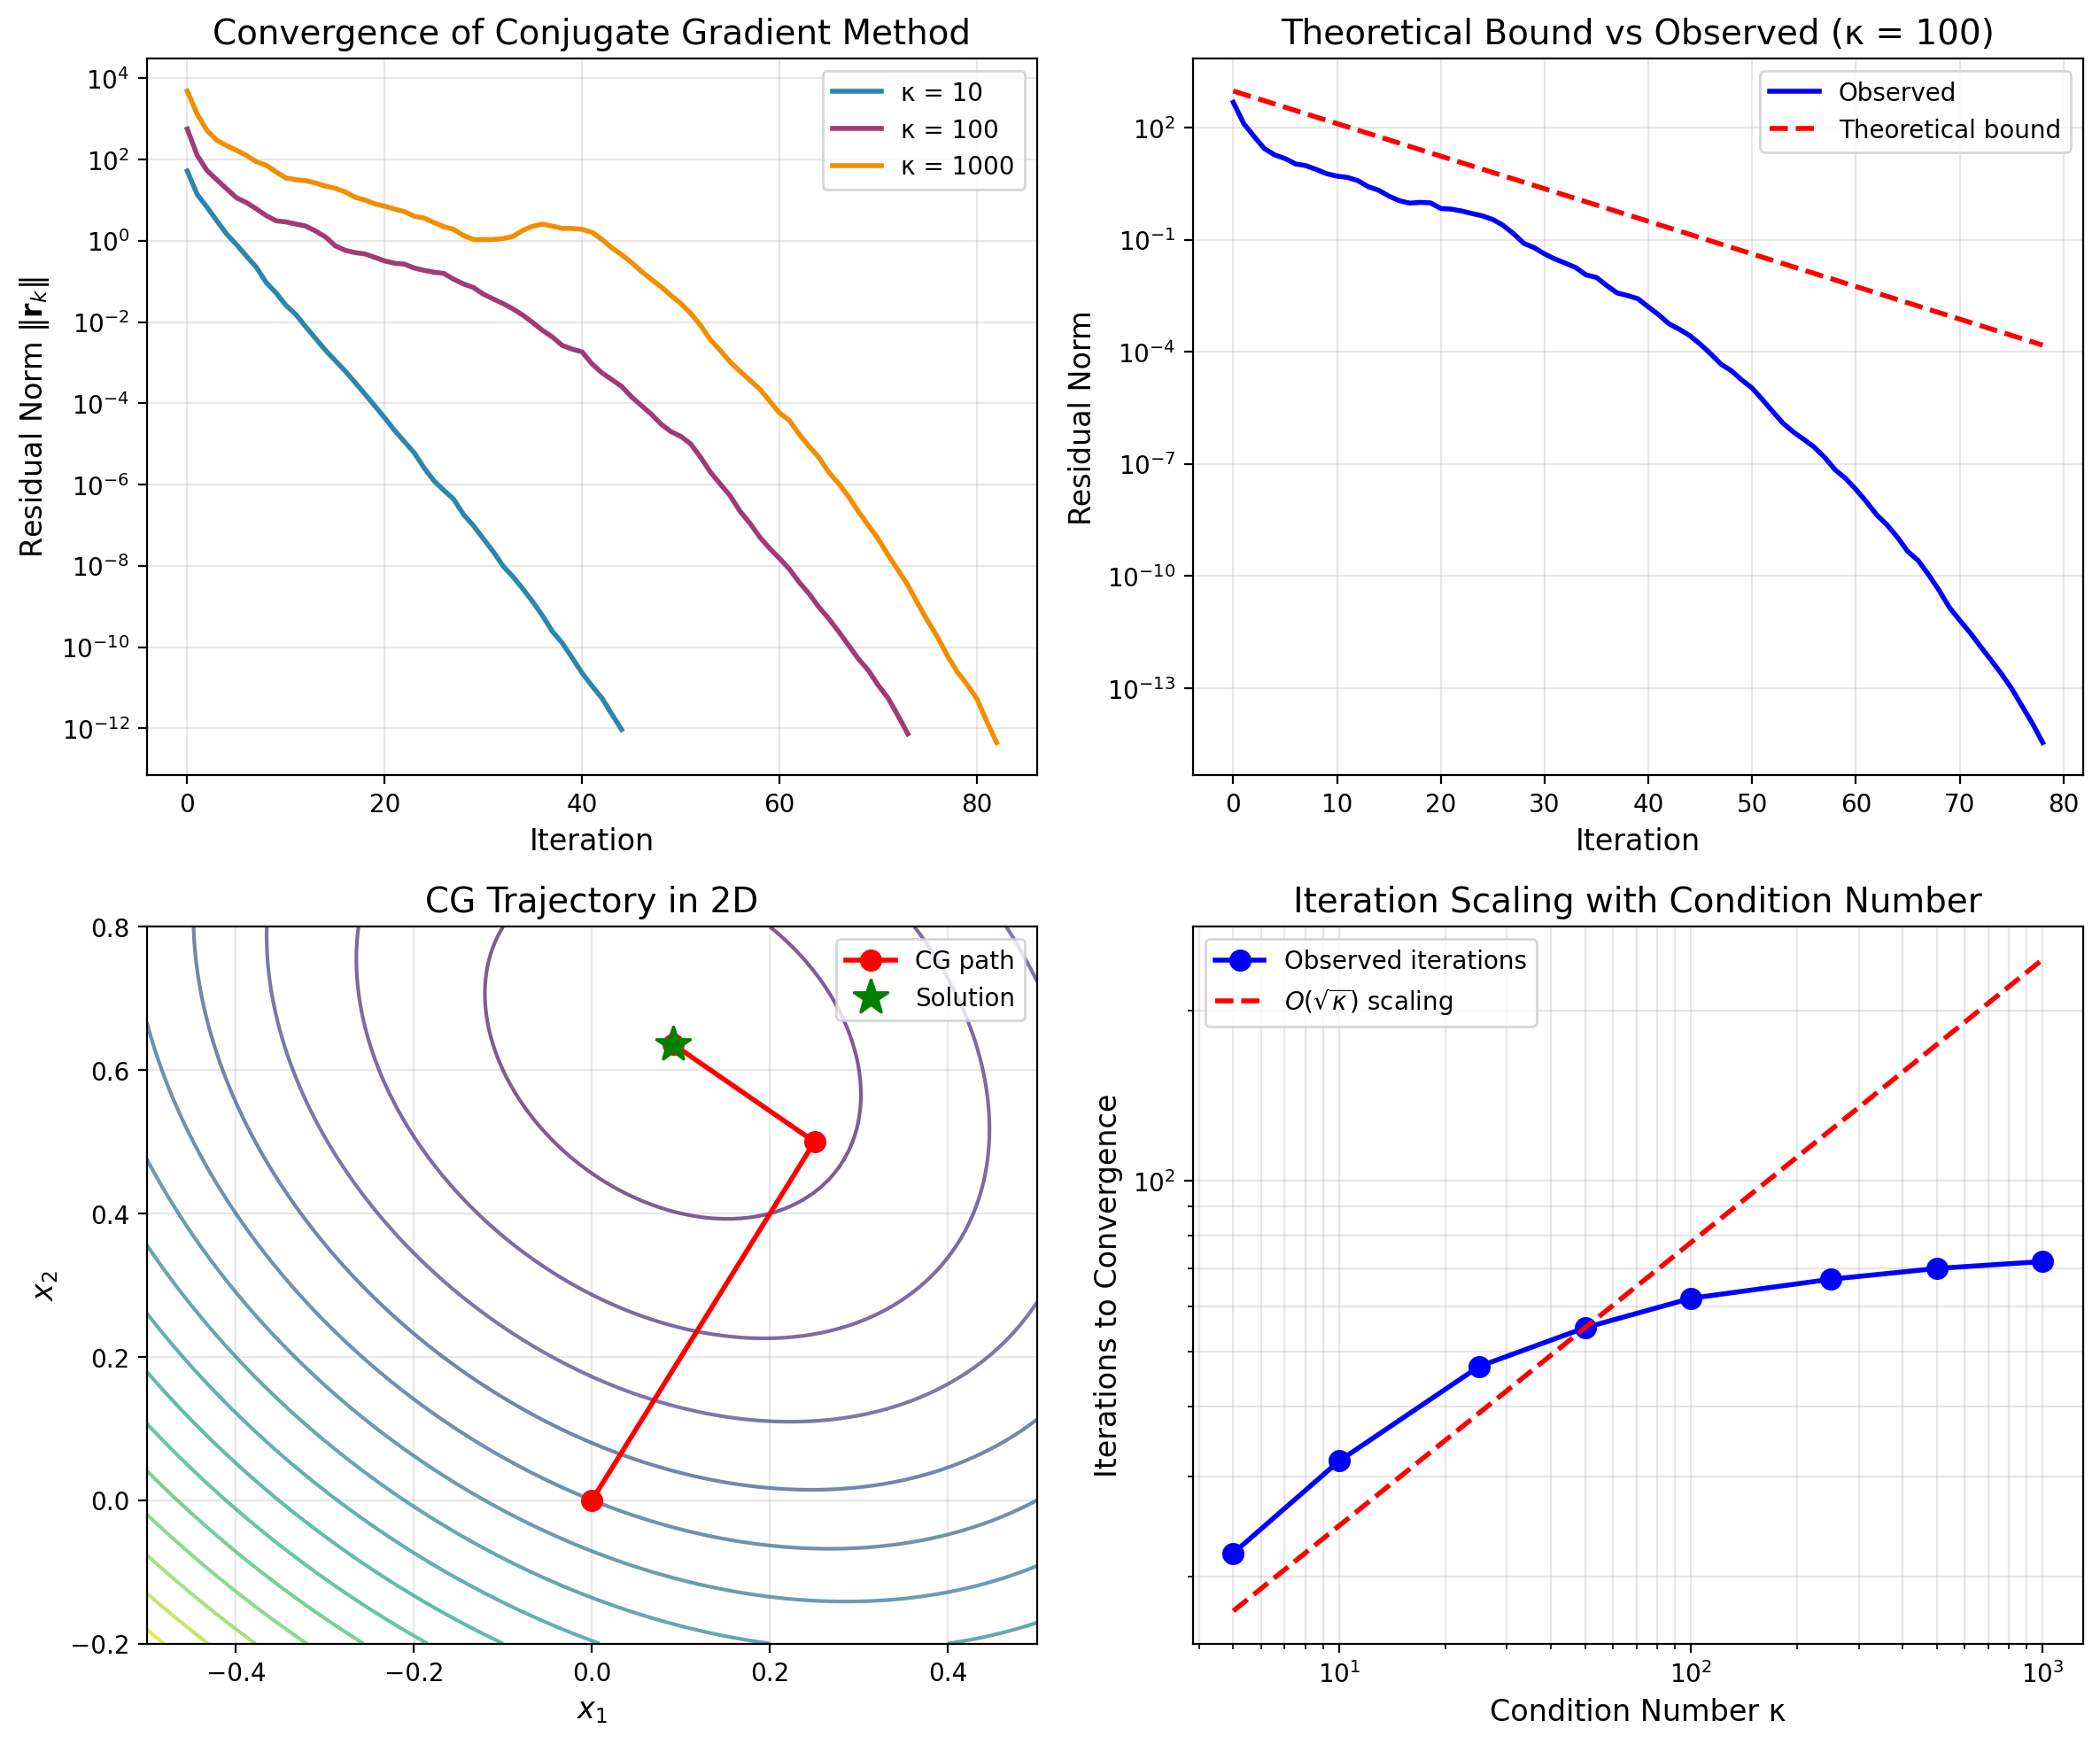


Plot saved to 'plot.png'


In [5]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Residual convergence for different condition numbers
ax1 = axes[0, 0]
colors = ['#2E86AB', '#A23B72', '#F18F01']
for i, kappa in enumerate(condition_numbers):
    residuals = results[kappa]['residuals']
    ax1.semilogy(range(len(residuals)), residuals, 
                 color=colors[i], linewidth=2, 
                 label=f'κ = {kappa}')

ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('Residual Norm $\\|\\mathbf{r}_k\\|$', fontsize=12)
ax1.set_title('Convergence of Conjugate Gradient Method', fontsize=14)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Theoretical vs observed convergence bound
ax2 = axes[0, 1]
kappa = 100
A = create_spd_matrix(n, kappa)
b = A @ x_true
x_cg, residuals = conjugate_gradient(A, b, tol=1e-14, max_iter=150)

# Theoretical bound
sqrt_kappa = np.sqrt(kappa)
bound_factor = (sqrt_kappa - 1) / (sqrt_kappa + 1)
iterations = np.arange(len(residuals))
theoretical_bound = 2 * (bound_factor ** iterations) * residuals[0]

ax2.semilogy(iterations, residuals, 'b-', linewidth=2, label='Observed')
ax2.semilogy(iterations, theoretical_bound, 'r--', linewidth=2, label='Theoretical bound')
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Residual Norm', fontsize=12)
ax2.set_title(f'Theoretical Bound vs Observed (κ = {kappa})', fontsize=14)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Plot 3: 2D visualization of search directions (small problem)
ax3 = axes[1, 0]

# Simple 2D problem for visualization
A_2d = np.array([[4, 1], [1, 3]])
b_2d = np.array([1, 2])
x_true_2d = np.linalg.solve(A_2d, b_2d)

# Store trajectory
x = np.array([0., 0.])
trajectory = [x.copy()]

r = b_2d - A_2d @ x
p = r.copy()
rs_old = r @ r

for _ in range(2):
    Ap = A_2d @ p
    alpha = rs_old / (p @ Ap)
    x = x + alpha * p
    trajectory.append(x.copy())
    r = r - alpha * Ap
    rs_new = r @ r
    if rs_new < 1e-14:
        break
    beta = rs_new / rs_old
    p = r + beta * p
    rs_old = rs_new

trajectory = np.array(trajectory)

# Plot contours of quadratic form
x_range = np.linspace(-0.5, 0.5, 100)
y_range = np.linspace(-0.2, 0.8, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)
for i in range(len(x_range)):
    for j in range(len(y_range)):
        vec = np.array([X[j, i], Y[j, i]])
        Z[j, i] = 0.5 * vec @ A_2d @ vec - b_2d @ vec

ax3.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.7)
ax3.plot(trajectory[:, 0], trajectory[:, 1], 'ro-', markersize=8, linewidth=2, label='CG path')
ax3.plot(x_true_2d[0], x_true_2d[1], 'g*', markersize=15, label='Solution')
ax3.set_xlabel('$x_1$', fontsize=12)
ax3.set_ylabel('$x_2$', fontsize=12)
ax3.set_title('CG Trajectory in 2D', fontsize=14)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# Plot 4: Iterations vs condition number
ax4 = axes[1, 1]

test_kappas = [5, 10, 25, 50, 100, 250, 500, 1000]
iterations_needed = []

for kappa in test_kappas:
    A = create_spd_matrix(n, kappa)
    b = A @ x_true
    _, residuals = conjugate_gradient(A, b, tol=1e-8, max_iter=500)
    iterations_needed.append(len(residuals) - 1)

# Theoretical scaling: O(sqrt(kappa))
theoretical_scaling = np.sqrt(test_kappas)
theoretical_scaling = theoretical_scaling * (iterations_needed[3] / theoretical_scaling[3])  # Normalize

ax4.loglog(test_kappas, iterations_needed, 'bo-', markersize=8, linewidth=2, label='Observed iterations')
ax4.loglog(test_kappas, theoretical_scaling, 'r--', linewidth=2, label=r'$O(\sqrt{\kappa})$ scaling')
ax4.set_xlabel('Condition Number κ', fontsize=12)
ax4.set_ylabel('Iterations to Convergence', fontsize=12)
ax4.set_title('Iteration Scaling with Condition Number', fontsize=14)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('conjugate_gradient_method_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Comparison with Direct Solver

For large sparse systems, CG is significantly more efficient than direct methods.

In [6]:
import time

# Create a larger test problem
n_large = 500
kappa_test = 100

A_large = create_spd_matrix(n_large, kappa_test)
x_true_large = np.random.randn(n_large)
b_large = A_large @ x_true_large

# Time direct solver
start = time.time()
x_direct = np.linalg.solve(A_large, b_large)
time_direct = time.time() - start

# Time CG solver
start = time.time()
x_cg, _ = conjugate_gradient(A_large, b_large, tol=1e-10)
time_cg = time.time() - start

print(f"Problem size: {n_large} x {n_large}")
print(f"Condition number: {kappa_test}")
print(f"\nDirect solver (LU):")
print(f"  Time: {time_direct*1000:.2f} ms")
print(f"  Error: {np.linalg.norm(x_direct - x_true_large) / np.linalg.norm(x_true_large):.2e}")
print(f"\nConjugate Gradient:")
print(f"  Time: {time_cg*1000:.2f} ms")
print(f"  Error: {np.linalg.norm(x_cg - x_true_large) / np.linalg.norm(x_true_large):.2e}")

Problem size: 500 x 500
Condition number: 100

Direct solver (LU):
  Time: 6.70 ms
  Error: 5.20e-15

Conjugate Gradient:
  Time: 5.30 ms
  Error: 4.88e-13


## Conclusions

The Conjugate Gradient method is a powerful iterative algorithm for solving linear systems with symmetric positive definite matrices. Key observations:

1. **Convergence Speed**: The number of iterations scales as $O(\sqrt{\kappa})$ where $\kappa$ is the condition number.

2. **Exact Solution**: In exact arithmetic, CG converges in at most $n$ iterations for an $n \times n$ system.

3. **A-Conjugate Directions**: The search directions are mutually $\mathbf{A}$-orthogonal, ensuring optimal progress at each step.

4. **Efficiency**: For large sparse systems, CG is significantly more efficient than direct methods like LU decomposition.

5. **Preconditioning**: The method can be accelerated by preconditioning, which effectively reduces the condition number of the system.

The CG method remains one of the most important algorithms in numerical linear algebra, particularly for large-scale problems arising in scientific computing, optimization, and machine learning.